In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms.functional as TF
from tqdm import tqdm
import torch.optim as optim
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from collections import OrderedDict
import matplotlib.pyplot as plt
from Network import *
from DataSet import *
from train_procedure import *
from Aug import *
from torchvision import transforms
import pickle

%load_ext autoreload
%autoreload 2

In [2]:
# Create the augmented dataset
create_augmented_dataset(True)

satImage_100.png: 100%|███████████████████████████████████████████████████████████| 100/100 [00:58<00:00,  1.72image/s]


In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
dict_train ={"save_model": True,
             'num_model': 1,
            "cross_val": False,
            "skip_connection": True,
            "num_epochs": 60,
            "n_splits": 1,
            "batch_size": 10,
            "scale_channel": 1,
            "dict_double_conv": {"BatchNorm": True,
                "activation": nn.ELU(inplace=True),
                "p_dropout": 0.0,
                "use_dropout": False,
                "bias": False},
            "dict_ups": {"BatchNorm": False,
                "p_dropout": 0.2,
                "use_dropout": False,
                "bias": False},
            "loss": nn.BCEWithLogitsLoss(),
            "optimizer": optim.Adam,
            "param_optimizer": {"weight_decay": 1e-05,
                               "lr": 5e-04},
            "use_scheduler": True,
            "type_scheduler": "ReduceLROnPlateau",
            "scheduler": torch.optim.lr_scheduler.ReduceLROnPlateau,
            "param_scheduler": {"mode": 'max',
                               "factor": 1./np.sqrt(10),
                               'min_lr': 1e-07,
                               'patience': 2,
                               'verbose': True},
             "scaler": torch.cuda.amp.GradScaler(),
             "device": DEVICE
            }

experiment_final1 = {"param": dict_train}
experiment_final1["convergence_path"] = run_training(dict_train) 


f = open("result_exp/experiment_final1.pkl","wb")
pickle.dump(experiment_final1,f)
f.close()

100%|████████████████████████████████████████████████████████████████████| 220/220 [01:22<00:00,  2.66it/s, loss=0.521]


Training set: epoch-1 got 133320335/172480000 with acc 77.30%, F1-score 0.37 and loss 0.5192978382110596 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.545]


Training set: epoch-2 got 139021268/172480000 with acc 80.60%, F1-score 0.39 and loss 0.43243643641471863 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.521]


Training set: epoch-3 got 142226351/172480000 with acc 82.46%, F1-score 0.49 and loss 0.3875443637371063 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.37it/s, loss=0.531]


Training set: epoch-4 got 145438655/172480000 with acc 84.32%, F1-score 0.56 and loss 0.35456329584121704 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.475]


Training set: epoch-5 got 148141660/172480000 with acc 85.89%, F1-score 0.62 and loss 0.3256905972957611 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.49it/s, loss=0.435]


Training set: epoch-6 got 149948425/172480000 with acc 86.94%, F1-score 0.65 and loss 0.3076094686985016 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.385]


Training set: epoch-7 got 151159983/172480000 with acc 87.64%, F1-score 0.68 and loss 0.29215604066848755 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.373]


Training set: epoch-8 got 151856776/172480000 with acc 88.04%, F1-score 0.69 and loss 0.2831619083881378 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.48it/s, loss=0.36]


Training set: epoch-9 got 152748358/172480000 with acc 88.56%, F1-score 0.70 and loss 0.27286168932914734 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.339]


Training set: epoch-10 got 153799645/172480000 with acc 89.17%, F1-score 0.72 and loss 0.26022833585739136 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.334]


Training set: epoch-11 got 154672534/172480000 with acc 89.68%, F1-score 0.74 and loss 0.24982817471027374 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.325]


Training set: epoch-12 got 155355271/172480000 with acc 90.07%, F1-score 0.75 and loss 0.24134323000907898 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.319]


Training set: epoch-13 got 156072839/172480000 with acc 90.49%, F1-score 0.76 and loss 0.23185789585113525 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.31]


Training set: epoch-14 got 156747184/172480000 with acc 90.88%, F1-score 0.77 and loss 0.2237263321876526 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.309]


Training set: epoch-15 got 157166722/172480000 with acc 91.12%, F1-score 0.78 and loss 0.2180408537387848 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.306]


Training set: epoch-16 got 157693877/172480000 with acc 91.43%, F1-score 0.79 and loss 0.2105080634355545 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.291]


Training set: epoch-17 got 158123865/172480000 with acc 91.68%, F1-score 0.79 and loss 0.20528769493103027 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.29]


Training set: epoch-18 got 158491693/172480000 with acc 91.89%, F1-score 0.80 and loss 0.20019033551216125 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.296]


Training set: epoch-19 got 158905604/172480000 with acc 92.13%, F1-score 0.81 and loss 0.1949458122253418 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.282]


Training set: epoch-20 got 159294915/172480000 with acc 92.36%, F1-score 0.81 and loss 0.18996977806091309 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.46it/s, loss=0.279]


Training set: epoch-21 got 159621064/172480000 with acc 92.54%, F1-score 0.82 and loss 0.18630126118659973 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.269]


Training set: epoch-22 got 159938132/172480000 with acc 92.73%, F1-score 0.82 and loss 0.18195098638534546 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.264]


Training set: epoch-23 got 160152326/172480000 with acc 92.85%, F1-score 0.82 and loss 0.17948268353939056 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.265]


Training set: epoch-24 got 160559076/172480000 with acc 93.09%, F1-score 0.83 and loss 0.17372053861618042 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.253]


Training set: epoch-25 got 160821021/172480000 with acc 93.24%, F1-score 0.83 and loss 0.1703808456659317 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.47it/s, loss=0.257]


Training set: epoch-26 got 160990566/172480000 with acc 93.34%, F1-score 0.84 and loss 0.16812890768051147 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.247]


Training set: epoch-27 got 161178413/172480000 with acc 93.45%, F1-score 0.84 and loss 0.16547468304634094 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.238]


Training set: epoch-28 got 161292958/172480000 with acc 93.51%, F1-score 0.84 and loss 0.1634780317544937 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.238]


Training set: epoch-29 got 161418957/172480000 with acc 93.59%, F1-score 0.84 and loss 0.1617891937494278 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.231]


Training set: epoch-30 got 161529878/172480000 with acc 93.65%, F1-score 0.84 and loss 0.16024546325206757 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.215]


Training set: epoch-31 got 161899253/172480000 with acc 93.87%, F1-score 0.85 and loss 0.15456777811050415 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.45it/s, loss=0.219]


Training set: epoch-32 got 161944823/172480000 with acc 93.89%, F1-score 0.85 and loss 0.15510572493076324 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.205]


Training set: epoch-33 got 162061254/172480000 with acc 93.96%, F1-score 0.85 and loss 0.15204016864299774 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.44it/s, loss=0.226]


Training set: epoch-34 got 161787424/172480000 with acc 93.80%, F1-score 0.85 and loss 0.1558028906583786 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.212]


Training set: epoch-35 got 162544526/172480000 with acc 94.24%, F1-score 0.86 and loss 0.14546312391757965 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.44it/s, loss=0.192]


Training set: epoch-36 got 162572897/172480000 with acc 94.26%, F1-score 0.86 and loss 0.144308403134346 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.44it/s, loss=0.184]


Training set: epoch-37 got 163142087/172480000 with acc 94.59%, F1-score 0.87 and loss 0.13672621548175812 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:03<00:00,  3.44it/s, loss=0.185]


Training set: epoch-38 got 162788898/172480000 with acc 94.38%, F1-score 0.86 and loss 0.1419578492641449 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.42it/s, loss=0.178]


Training set: epoch-39 got 163601282/172480000 with acc 94.85%, F1-score 0.87 and loss 0.13013982772827148 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.42it/s, loss=0.173]


Training set: epoch-40 got 163856015/172480000 with acc 95.00%, F1-score 0.88 and loss 0.12643161416053772 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.43it/s, loss=0.164]


Training set: epoch-41 got 164020837/172480000 with acc 95.10%, F1-score 0.88 and loss 0.12366646528244019 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.42it/s, loss=0.191]


Training set: epoch-42 got 163954022/172480000 with acc 95.06%, F1-score 0.88 and loss 0.12417279928922653 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.42it/s, loss=0.166]


Training set: epoch-43 got 163805892/172480000 with acc 94.97%, F1-score 0.88 and loss 0.1262843906879425 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.42it/s, loss=0.161]


Training set: epoch-44 got 164296170/172480000 with acc 95.26%, F1-score 0.88 and loss 0.11916741728782654 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.178]


Training set: epoch-45 got 163603819/172480000 with acc 94.85%, F1-score 0.87 and loss 0.1285744309425354 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.41it/s, loss=0.165]


Training set: epoch-46 got 164432742/172480000 with acc 95.33%, F1-score 0.89 and loss 0.11754550784826279 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.41it/s, loss=0.154]


Training set: epoch-47 got 164825313/172480000 with acc 95.56%, F1-score 0.89 and loss 0.11138983815908432 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.148]


Training set: epoch-48 got 164942278/172480000 with acc 95.63%, F1-score 0.89 and loss 0.10935062915086746 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.144]


Training set: epoch-49 got 165369660/172480000 with acc 95.88%, F1-score 0.90 and loss 0.10343316197395325 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.135]


Training set: epoch-50 got 165558885/172480000 with acc 95.99%, F1-score 0.90 and loss 0.10014075040817261 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.143]


Training set: epoch-51 got 165485081/172480000 with acc 95.94%, F1-score 0.90 and loss 0.10077674686908722 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.144]


Training set: epoch-52 got 165669193/172480000 with acc 96.05%, F1-score 0.90 and loss 0.09799817949533463 


100%|█████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.16]


Training set: epoch-53 got 165065670/172480000 with acc 95.70%, F1-score 0.90 and loss 0.10603752732276917 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.146]


Training set: epoch-54 got 165140518/172480000 with acc 95.74%, F1-score 0.90 and loss 0.10619255900382996 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.131]


Training set: epoch-55 got 165846019/172480000 with acc 96.15%, F1-score 0.91 and loss 0.09543848037719727 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.40it/s, loss=0.136]


Training set: epoch-56 got 166036244/172480000 with acc 96.26%, F1-score 0.91 and loss 0.09230318665504456 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.136]


Training set: epoch-57 got 166129392/172480000 with acc 96.32%, F1-score 0.91 and loss 0.09078468382358551 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:04<00:00,  3.39it/s, loss=0.127]


Training set: epoch-58 got 166223016/172480000 with acc 96.37%, F1-score 0.91 and loss 0.08910007774829865 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.127]


Training set: epoch-59 got 166574433/172480000 with acc 96.58%, F1-score 0.92 and loss 0.08378780633211136 


100%|████████████████████████████████████████████████████████████████████| 220/220 [01:05<00:00,  3.38it/s, loss=0.118]


Training set: epoch-60 got 166668248/172480000 with acc 96.63%, F1-score 0.92 and loss 0.0821266770362854 


In [24]:
exp_4_

{'param': {'save_model': True,
  'num_model': 1,
  'cross_val': False,
  'skip_connection': True,
  'num_epochs': 60,
  'n_splits': 1,
  'batch_size': 10,
  'scale_channel': 1,
  'dict_double_conv': {'BatchNorm': True,
   'activation': ELU(alpha=1.0, inplace=True),
   'p_dropout': 0.0,
   'use_dropout': False,
   'bias': False},
  'dict_ups': {'BatchNorm': False,
   'p_dropout': 0.2,
   'use_dropout': False,
   'bias': False},
  'loss': BCEWithLogitsLoss(),
  'optimizer': torch.optim.adam.Adam,
  'param_optimizer': {'weight_decay': 1e-05, 'lr': 0.0005},
  'use_scheduler': True,
  'type_scheduler': 'ReduceLROnPlateau',
  'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau,
  'param_scheduler': {'mode': 'max',
   'factor': 0.31622776601683794,
   'min_lr': 1e-07,
   'patience': 2,
   'verbose': True},
  'scaler': <torch.cuda.amp.grad_scaler.GradScaler at 0x7f9155b581c0>,
  'device': 'cuda'},
 'convergence_path': {'train_acc': [tensor(0.7730),
   tensor(0.8060),
   tensor(0.8246),
   

ValueError: operands could not be broadcast together with shapes (60,) (0,) 

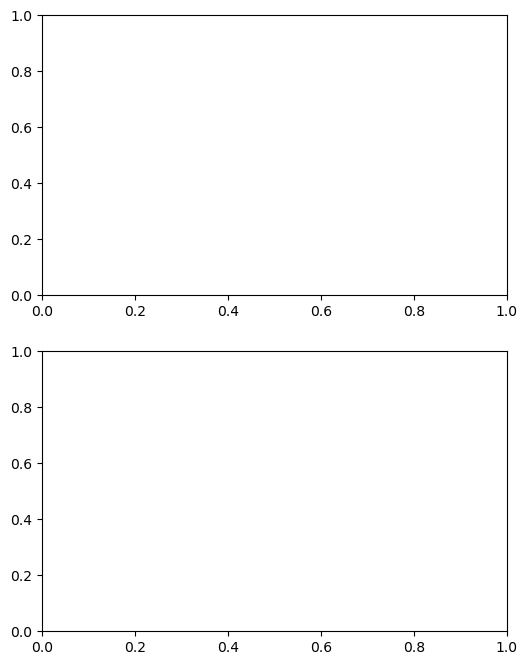

In [23]:
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)



f = open(f"result_exp/experiment_final1.pkl","rb")
exp_4_ = CPU_Unpickler(f).load()
f.close()


fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,8))

y = 0.5*(np.array(exp_4_["convergence_path"]["train_F1"]) + np.array(exp_4_["convergence_path"]["val_F1"]))
ax1.plot(np.arange(1,len(y)+1),y,label=r"p=0, $n_{batch} = 10$, $\lambda=0$")
y = 0.5*(np.array(exp_4_["convergence_path"]["train_acc"]) + np.array(exp_4_["convergence_path"]["val_acc"]))
ax2.plot(np.arange(1,len(y)+1),y,'-',label=r"p=0, $n_{batch} = 10$, $\lambda=0$")
    

ax2.legend()
ax1.legend()
ax1.set_title('Validation F1 score')
ax2.set_title('Validation Accuracy')
fig.supxlabel('epoch',y=0.05)
#plt.savefig('Figure/val_acc_3.pdf', dpi=300, bbox_inches='tight')
plt.show()